<a href="https://colab.research.google.com/github/pas3n7/ColabDataScienceLearning/blob/main/Coronavirusbytrumpiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we try to do coronavirus data stuff


In [831]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [832]:
elecdata = pd.read_csv("/content/drive/MyDrive/Data/countypres_2000-2016.csv")

In [833]:
# is2016 = elecdata['year'] == 2016
# elecdata[is2016]
elec2016 = elecdata[elecdata['year'] == 2016]
elec2016 = elecdata[elecdata['candidate'] == 'Donald Trump']
elec2016 = elec2016.dropna()
elec2016 = elec2016.drop(columns=['office', 'party', 'version'])
##Need to drop alaska. Districts / FIPS is all messed up and mismatched, leading to data that doesn't make sense.
elec2016 = elec2016[elec2016['state_po'] != 'AK']

In [834]:
popdataurl = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv"
popdata = pd.read_csv(popdataurl, encoding='latin-1')
popdata = popdata[popdata['COUNTY'] != 0]

In [835]:
#popdata[popdata['STNAME']=="Alaska"]

In [836]:
elec2016 = elec2016.assign(trumpiness =elec2016['candidatevotes'] / elec2016['totalvotes'])
elec2016 = elec2016.drop(columns=['candidate', 'candidatevotes'])

In [837]:
cvdataurl = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
coronadata = pd.read_csv(cvdataurl)

In [838]:
coronadata[(coronadata['Province_State'] == "Texas") & (coronadata['Admin2'] == "Webb")]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21
2939,84048479,US,USA,840,48479.0,Webb,Texas,US,27.761037,-99.332374,"Webb, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22585,22750,22859,22971,23131,23503,23723,23915,23915,24420,24420,24915,24915,25514,25514,25514,25875,26143,26143,26821,26967,26989,26989,26989,26989,27393,27686,27686,28721,28721,29601,29601,29601,32658,32658,32658,34322,34499,34690,35568


In [839]:
coronadata = coronadata.iloc[:, 4:6].assign(lastweek = coronadata.iloc[:, -1] - coronadata.iloc[:, -7])

In [840]:
combined = pd.merge(left=elec2016, right=coronadata, on="FIPS")

In [841]:
popcounties = popdata['STATE'].astype(str) + popdata['COUNTY'].astype(str).apply('{:0>3}'.format)
popcounties = popcounties.astype(float)
popdata = pd.DataFrame({"FIPS": popcounties, "population" : popdata["POPESTIMATE2019"]})

In [842]:
combined = pd.merge(left=combined, right=popdata, on="FIPS")

In [843]:
combined['infectiness'] = combined['lastweek'] / combined['population']

In [844]:
##---- Variables for data selection in the graph
minpop = 0
maxpop = 100_000_000_000 #just make this really big to see all
stddevs = 2 #exclude data outside of this many standard deviations from the mean

Text(0, 0.5, 'Infectiness')

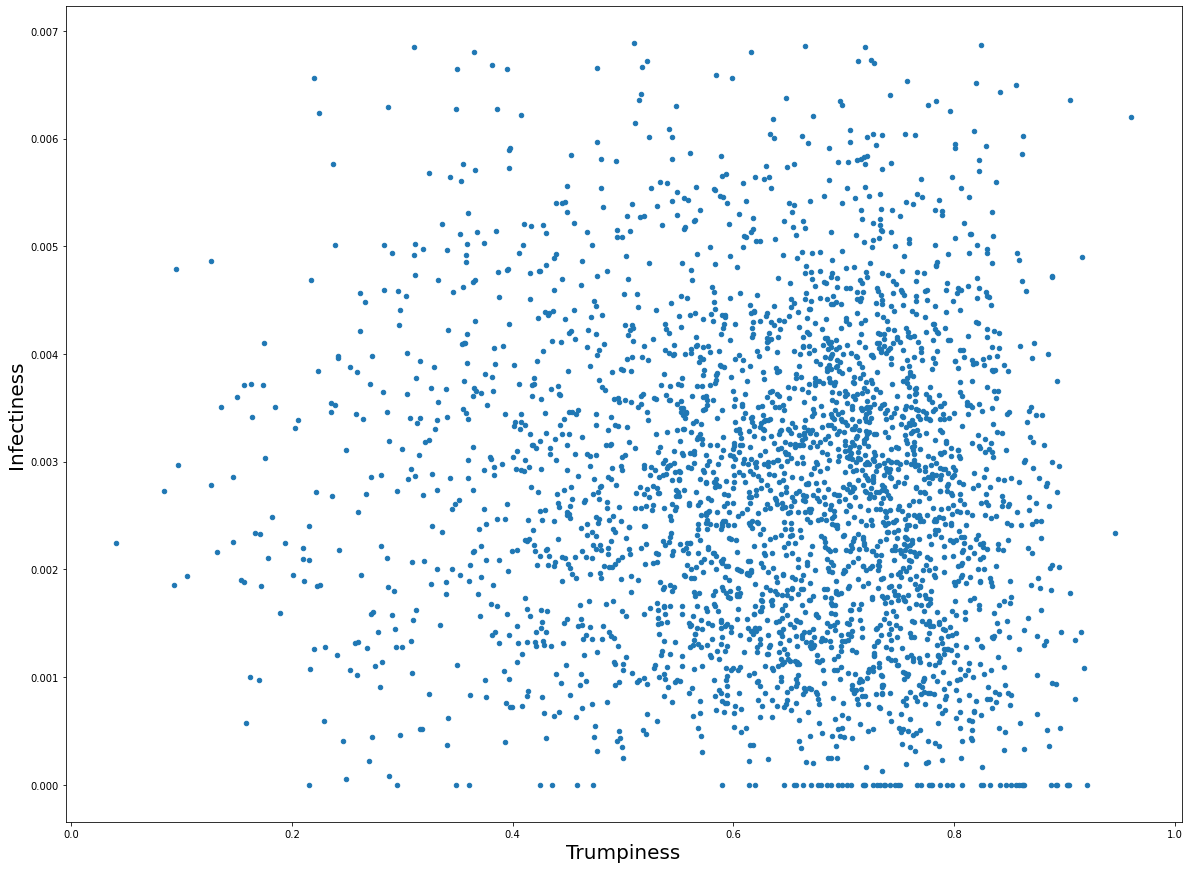

In [845]:
combinout = combined[np.abs(stats.zscore(combined['infectiness']) < stddevs)]
combinout = combinout[(combinout['population'] > minpop) & (combinout['population'] < maxpop)]
combinout = combinout[combinout['infectiness'] >=0]
combinout.plot.scatter(x="trumpiness", y="infectiness", figsize=(20, 15))
plt.xlabel('Trumpiness', fontsize=20)
plt.ylabel('Infectiness', fontsize=20)

In [846]:
#combined = combined.assign(oldinfectiness = combined["lastweek"]/combined["totalvotes"])
#combined.sort_values(by="oldinfectiness", ascending=False).head(20)

# combined = combined.assign(votiness = combined["totalvotes"]/combined["population"])
# combined.sort_values(by="votiness", ascending=True).head(20)

combined.sort_values(by="infectiness", ascending=True).tail(20)

,year,state,state_po,county,FIPS,totalvotes,trumpiness,Admin2,lastweek,population,infectiness
2731,2016,Texas,TX,Webb,48479.0,56905,0.227520,Webb,2910,276652,0.010519
2853,2016,Virginia,VA,Nottoway,51135.0,6744,0.550415,Nottoway,161,15232,0.010570
2996,2016,West Virginia,WV,Pendleton,54071.0,3225,0.743566,Pendleton,74,6969,0.010618
2652,2016,Texas,TX,Matagorda,48321.0,12196,0.685963,Matagorda,396,36643,0.010807
896,2016,Kansas,KS,Harper,20077.0,2578,0.774244,Harper,60,5436,0.011038
3002,2016,West Virginia,WV,Randolph,54083.0,10876,0.701453,Randolph,331,28695,0.011535
2657,2016,Texas,TX,Milam,48331.0,8664,0.734534,Milam,290,24823,0.011683
2735,2016,Texas,TX,Wilbarger,48487.0,4105,0.771255,Wilbarger,152,12769,0.011904
2900,2016,Virginia,VA,Hopewell,51670.0,9008,0.431283,Hopewell,270,22529,0.011985
1055,2016,Kentucky,KY,Oldham,21185.0,32853,0.623048,Oldham,813,66799,0.012171
